In [2]:
print("Bildverarbeitung")

Bildverarbeitung


# Datensatz runter laden



In [3]:
!dir

cv_damals_und_heute.ipynb  prep


In [4]:
!ls -la

total 32
drwxrwxr-x  4 juebrauer juebrauer  4096 Okt  9 10:49 .
drwxrwxr-x 71 juebrauer juebrauer  4096 Okt  4 11:07 ..
-rw-rw-r--  1 juebrauer juebrauer 15103 Okt  9 10:49 cv_damals_und_heute.ipynb
drwxrwxr-x  2 juebrauer juebrauer  4096 Okt  9 10:50 .ipynb_checkpoints
drwxrwxr-x  3 juebrauer juebrauer  4096 Okt  4 15:24 prep


In [6]:
import urllib.request
fname = "pedestrian_dataset.zip"
URL = "http://www.juergenbrauer.org/datasets/" + fname
urllib.request.urlretrieve(URL, fname)

('pedestrian_dataset.zip', <http.client.HTTPMessage at 0x7f29743e2d10>)

# Datensatz entpacken

In [7]:
import shutil
shutil.unpack_archive(fname, ".")

# Liste der Bilddateien bestimmen

In [8]:
dataset_dir = "pedestrian_dataset"
!dir $dataset_dir

added-object-list.txt  Annotation  PedMasks  PNGImages	readme.txt


In [9]:
dataset_dir + "/PNGImages"

'pedestrian_dataset/PNGImages'

In [10]:
import os
list_of_image_files = os.listdir(dataset_dir + "/PNGImages")

In [11]:
type(list_of_image_files)

list

In [12]:
list_of_image_files[:5]

['PennPed00052.png',
 'PennPed00024.png',
 'PennPed00034.png',
 'PennPed00014.png',
 'PennPed00081.png']

In [13]:
%whos

Variable              Type      Data/Info
-----------------------------------------
URL                   str       http://www.juergenbrauer.<...>ts/pedestrian_dataset.zip
cv2                   module    <module 'cv2' from '/home<...>ackages/cv2/__init__.py'>
dataset_dir           str       pedestrian_dataset
fname                 str       pedestrian_dataset.zip
list_of_image_files   list      n=170
os                    module    <module 'os' (frozen)>
shutil                module    <module 'shutil' from '/h<...>ib/python3.11/shutil.py'>
urllib                module    <module 'urllib' from '/h<...>3.11/urllib/__init__.py'>


In [14]:
len(list_of_image_files)

170

# Ein Bild anzeigen mit OpenCV

In [15]:
!pip show opencv-python

Name: opencv-python
Version: 4.8.1.78
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /home/juebrauer/prg/miniconda3/envs/env_ws23/lib/python3.11/site-packages
Requires: numpy, numpy, numpy, numpy, numpy
Required-by: ultralytics


In [16]:
!pip install opencv-python

In [17]:
import cv2

In [18]:
list_of_image_files[0]

'PennPed00052.png'

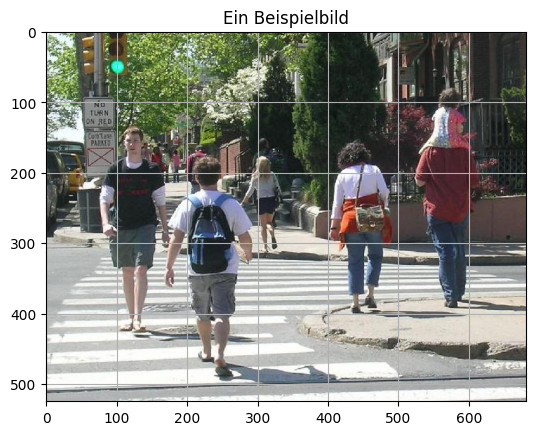

In [23]:
dataset_dir = "pedestrian_dataset"

import cv2
fname = dataset_dir + "/PNGImages/" + list_of_image_files[0]
img = cv2.imread( fname )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow( img )
plt.title("Ein Beispielbild")
plt.grid()
plt.show()

In [ ]:
list_of_image_files = ["readme.txt"] + list_of_image_files

In [ ]:
list_of_image_files[:5]

In [ ]:
img

# CV damals: HOG-Detektor

In [24]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [25]:
img_gray.ndim

2

In [26]:
img_gray.shape

(525, 682)

In [27]:
img.shape

(525, 682, 3)

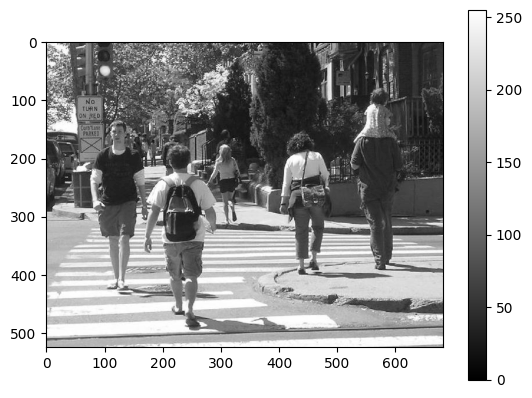

In [30]:
plt.imshow(img_gray, cmap="gray")
plt.colorbar()
plt.show()

In [31]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector( cv2.HOGDescriptor_getDefaultPeopleDetector())

In [32]:
type(hog)

cv2.HOGDescriptor

In [34]:
boxes, weights = hog.detectMultiScale( img_gray, winStride=(8,8) )

In [35]:
boxes

array([[266, 159,  93, 186],
       [399, 244,  86, 172],
       [202, 324,  91, 181],
       [ 41, 127, 176, 353],
       [367, 117, 163, 326],
       [163, 218, 149, 296],
       [478,  68, 187, 374]], dtype=int32)

In [36]:
weights

array([1.23018971, 0.96717779, 0.51374921, 2.02308304, 2.01149692,
       1.16923304, 1.19388431])

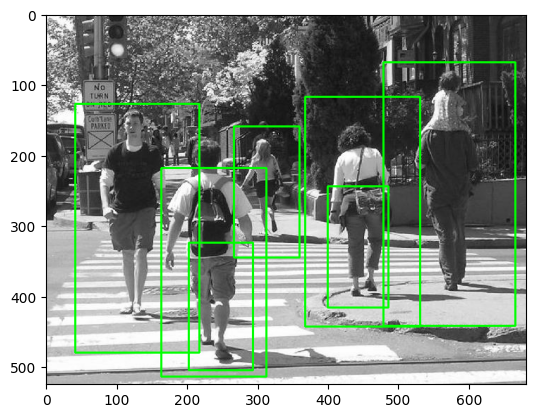

In [45]:
visu = img_gray.copy()
visu = cv2.cvtColor(visu, cv2.COLOR_GRAY2BGR)
for x,y,w,h in boxes:
    cv2.rectangle(visu, (x,y), (x+w,y+h), (0,255,0), 2)
plt.imshow(visu)
plt.show()

In [38]:
boxes

array([[266, 159,  93, 186],
       [399, 244,  86, 172],
       [202, 324,  91, 181],
       [ 41, 127, 176, 353],
       [367, 117, 163, 326],
       [163, 218, 149, 296],
       [478,  68, 187, 374]], dtype=int32)

In [39]:
for x in boxes:
    print(x)

[266 159  93 186]
[399 244  86 172]
[202 324  91 181]
[ 41 127 176 353]
[367 117 163 326]
[163 218 149 296]
[478  68 187 374]


In [44]:
x,y,w,h = [266,159, 93,186]

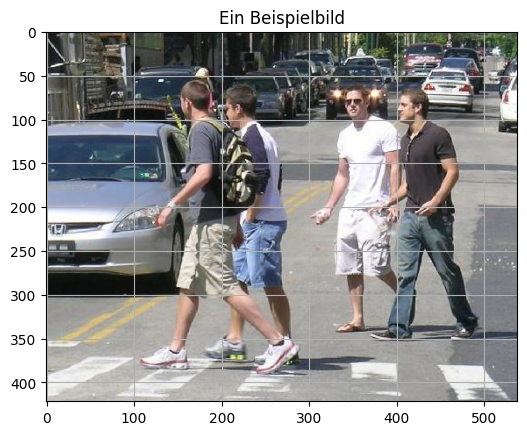

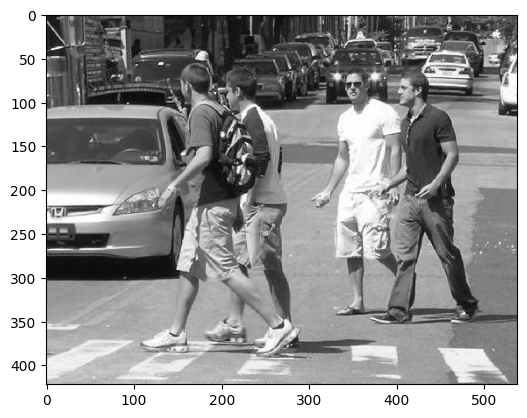

In [50]:
# 1. HOG-Detektor vorbereiten
hog = cv2.HOGDescriptor()
hog.setSVMDetector( cv2.HOGDescriptor_getDefaultPeopleDetector() )

# 2. Bild einlesen
dataset_dir = "pedestrian_dataset"
import cv2
fname = dataset_dir + "/PNGImages/" + list_of_image_files[2]
img = cv2.imread( fname )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. Bild anzeigen
import matplotlib.pyplot as plt
plt.imshow( img )
plt.title("Ein Beispielbild")
plt.grid()
plt.show()

# 4. Graustufenbild vorbereiten
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 5. HOG-Detektor anwenden auf das Bild
boxes, weights = hog.detectMultiScale( img_gray, winStride=(8,8) )

# 6. Detektionsergebnisse anzeigen
visu = img_gray.copy()
visu = cv2.cvtColor(visu, cv2.COLOR_GRAY2BGR)
for x,y,w,h in boxes:
    cv2.rectangle(visu, (x,y), (x+w,y+h), (0,255,0), 2)
plt.imshow(visu)
plt.show()